# Beautiful Soup Notebook

### Pre-Requisite Installation

1. Python and Jupyter Notebook installed and running
2. Python Packages requests and beautifulsoup installed
- `pip install package_name`

### Basic Terminology:
- XPATH - XPath uses path expressions to select nodes or node-sets in an XML document. This can vary for different browsers. Reference: https://www.w3schools.com/xml/xpath_intro.asp
- CSS Selectors - In CSS, selectors are patterns used to select the element(s) you want to style. This remains the same for webpage. Reference: https://www.w3schools.com/cssref/css_selectors.asp

### A few pointers:
- Try exploring a webpage manually first, look for patterns and try to make your code as generic as possible.
- The same webpage may behave different in different browsers.

### Ready Set Scrape
Lets begin by scraping the data from the IMDb Top Rated Movies Webpage at the following URL:

https://www.imdb.com/chart/top?ref_=nv_mv_250

In [48]:
# Import libraries
import requests
from bs4 import BeautifulSoup

In [49]:
# Scrape the First Page of the Handbook
website_link='https://www.imdb.com'
#page = requests.get('https://handbook.unimelb.edu.au/')
page = requests.get(website_link+'/chart/top?ref_=nv_mv_250')


print(type(page))

page.text

<class 'requests.models.Response'>


u'\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    \n    \n    \n\n    \n    \n    \n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n            <style>\n                body#styleguide-v2 {\n                    background: no-repeat fixed center top #000;\n                }\n            </style>\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>IMDb Top 250 - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_tit

### What's with all this  ```<something> something <something>``` Text

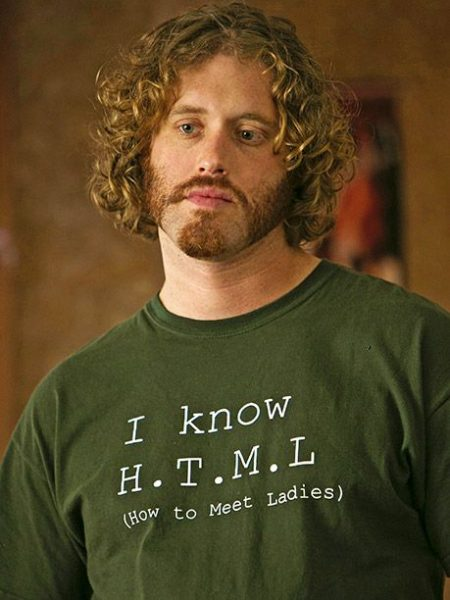
Source: Silicon valley

### HTML is just this really:

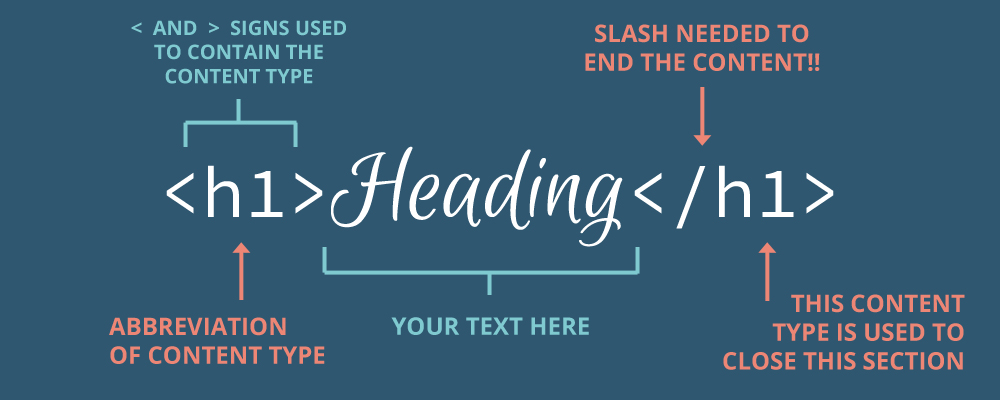

Source (and good html reference): http://www.thesepapersites.com/2016/09/13/html-tags-explained-simply/


In [50]:
# Create a BeautifulSoup object to read between the tags
soup = BeautifulSoup(page.text, 'html.parser')
soup

\n<!DOCTYPE html>\n\n<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">\n<head>\n<meta charset="unicode-escape"/>\n<meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n<meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>\n<style>\n                body#styleguide-v2 {\n                    background: no-repeat fixed center top #000;\n                }\n            </style>\n<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>\n<script>\n    if (typeof uet == 'function') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<title>IMDb Top 250 - IMDb</title>\n<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == 'function') {\n      uet("be", "LoadT

## Pulling Text From a Web Page

We’ll collect artists’ names and the relevant links available on the website. You may want to collect different data, such as the artists’ nationality and dates. Whatever data you would like to collect, you need to find out how it is described by the DOM of the web page.

In [51]:
# Pull all text from the required div class

#handbook_list=soup.find(class_="body-handbook")

#handbook_list
movies_list=soup.find(class_="lister")
movies_list

<div class="lister">\n<div>\n<div class="nav">\n<div class="controls float-right lister-activated">\n<label class="lister-sort-by-label" for="lister-sort-by-options">Sort by: </label>\n<select class="lister-sort-by" id="lister-sort-by-options" name="sort">\n<option selected="selected" value="rk:ascending">\n          Ranking\n        </option>\n<option value="ir:descending">\n          IMDb Rating\n        </option>\n<option value="us:descending">\n          Release Date\n        </option>\n<option value="nv:descending">\n          Number of Ratings\n        </option>\n<option value="ur:descending">\n          Your Rating\n        </option>\n</select>\n<span class="global-sprite lister-sort-reverse descending" data-sort="rk:desc">\n</span>\n</div>\n<div class="desc">Showing <span>250</span> Titles</div>\n</div>\n</div>\n<br class="clear"/>\n<table class="chart full-width" data-caller-name="chart-top250movie">\n<colgroup>\n<col class="chartTableColumnPoster"/>\n<col class="chartTableCol

In [52]:
# Pull all text from the BodyText div

#course_type_list=handbook_list.find(class_="browse-by-course-type")
#course_type_list

top_movies_table=movies_list.find(class_="lister-list")
top_movies_table

<tbody class="lister-list">\n<tr>\n<td class="posterColumn">\n<span data-value="1" name="rk"></span>\n<span data-value="9.216927270385236" name="ir"></span>\n<span data-value="7.791552E11" name="us"></span>\n<span data-value="2052051" name="nv"></span>\n<span data-value="-1.783072729614764" name="ur"></span>\n<a href="/title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&amp;pf_rd_r=61RXRK2BXBGQWM2CE6F2&amp;pf_rd_s=center-1&amp;pf_rd_t=15506&amp;pf_rd_i=top&amp;ref_=chttp_tt_1"> <img alt="The Shawshank Redemption" height="67" src="https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UY67_CR0,0,45,67_AL_.jpg" width="45"/>\n</a> </td>\n<td class="titleColumn">\n      1.\n      <a href="/title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&amp;pf_rd_r=61RXRK2BXBGQWM2CE6F2&amp;pf_rd_s=center-1&amp;pf_rd_t=15506&amp;pf_rd_i=top&amp;ref_=chttp_tt_1" titl

In [53]:
# Pull text from all instances of <a> tag within BodyText div

#course_type_list_item_links=course_type_list.find_all('a')
#course_type_list_item_links

top_movies_titles=top_movies_table.find_all(class_="titleColumn")
top_movies_titles

[<td class="titleColumn">\n      1.\n      <a href="/title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&amp;pf_rd_r=61RXRK2BXBGQWM2CE6F2&amp;pf_rd_s=center-1&amp;pf_rd_t=15506&amp;pf_rd_i=top&amp;ref_=chttp_tt_1" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>\n<span class="secondaryInfo">(1994)</span>\n</td>,
 <td class="titleColumn">\n      2.\n      <a href="/title/tt0068646/?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&amp;pf_rd_r=61RXRK2BXBGQWM2CE6F2&amp;pf_rd_s=center-1&amp;pf_rd_t=15506&amp;pf_rd_i=top&amp;ref_=chttp_tt_2" title="Francis Ford Coppola (dir.), Marlon Brando, Al Pacino">The Godfather</a>\n<span class="secondaryInfo">(1972)</span>\n</td>,
 <td class="titleColumn">\n      3.\n      <a href="/title/tt0071562/?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&amp;pf_rd_r=61RXRK2BXBGQWM2CE6F2&amp;pf_rd_s=center-1&amp;pf_rd_t=15506&amp;pf_rd_i=to

### Challenge

Extract the IMDb Rating similar to the movie titles
HINT: Look out for the class name for the corresponding data using inspect element

In [ ]:
####Insert Your Code here


Removing Superfluous Data

In [54]:
#for cname in course_type_list_item_links:
#    print(cname.prettify())
for row in top_movies_titles:
    print(row.prettify())

<td class="titleColumn">
 1.
 <a href="/title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&amp;pf_rd_r=61RXRK2BXBGQWM2CE6F2&amp;pf_rd_s=center-1&amp;pf_rd_t=15506&amp;pf_rd_i=top&amp;ref_=chttp_tt_1" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">
  The Shawshank Redemption
 </a>
 <span class="secondaryInfo">
  (1994)
 </span>
</td>

<td class="titleColumn">
 2.
 <a href="/title/tt0068646/?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&amp;pf_rd_r=61RXRK2BXBGQWM2CE6F2&amp;pf_rd_s=center-1&amp;pf_rd_t=15506&amp;pf_rd_i=top&amp;ref_=chttp_tt_2" title="Francis Ford Coppola (dir.), Marlon Brando, Al Pacino">
  The Godfather
 </a>
 <span class="secondaryInfo">
  (1972)
 </span>
</td>

<td class="titleColumn">
 3.
 <a href="/title/tt0071562/?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&amp;pf_rd_r=61RXRK2BXBGQWM2CE6F2&amp;pf_rd_s=center-1&amp;pf_rd_t=15506&amp;pf_rd_i=top&amp;ref_=chttp_tt_3

### Challenge

Use Prettify and get the contents of the extracted soup HINT: Just Copy the same for title with your extracted data soup

In [1]:
#### Insert Your Code Here


In [55]:
#for cname in course_type_list_item_links:
#    print(cname.contents)

for row in top_movies_titles:
    print(row.contents)

[u'\n      1.\n      ', <a href="/title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&amp;pf_rd_r=61RXRK2BXBGQWM2CE6F2&amp;pf_rd_s=center-1&amp;pf_rd_t=15506&amp;pf_rd_i=top&amp;ref_=chttp_tt_1" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>, u'\n', <span class="secondaryInfo">(1994)</span>, u'\n']
[u'\n      2.\n      ', <a href="/title/tt0068646/?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&amp;pf_rd_r=61RXRK2BXBGQWM2CE6F2&amp;pf_rd_s=center-1&amp;pf_rd_t=15506&amp;pf_rd_i=top&amp;ref_=chttp_tt_2" title="Francis Ford Coppola (dir.), Marlon Brando, Al Pacino">The Godfather</a>, u'\n', <span class="secondaryInfo">(1972)</span>, u'\n']
[u'\n      3.\n      ', <a href="/title/tt0071562/?pf_rd_m=A2FGELUUNOQJNL&amp;pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&amp;pf_rd_r=61RXRK2BXBGQWM2CE6F2&amp;pf_rd_s=center-1&amp;pf_rd_t=15506&amp;pf_rd_i=top&amp;ref_=chttp_tt_3" title="Francis Ford 

In [56]:
# Remove bottom links
#for cname in course_type_list_item_links:
#    print(cname.text)
for row in top_movies_titles:
    print(row.text.replace('\n',''))

      1.      The Shawshank Redemption(1994)
      2.      The Godfather(1972)
      3.      The Godfather: Part II(1974)
      4.      The Dark Knight(2008)
      5.      12 Angry Men(1957)
      6.      Schindler's List(1993)
      7.      The Lord of the Rings: The Return of the King(2003)
      8.      Pulp Fiction(1994)
      9.      The Good, the Bad and the Ugly(1966)
      10.      Fight Club(1999)
      11.      The Lord of the Rings: The Fellowship of the Ring(2001)
      12.      Forrest Gump(1994)
      13.      Star Wars: Episode V - The Empire Strikes Back(1980)
      14.      Inception(2010)
      15.      The Lord of the Rings: The Two Towers(2002)
      16.      One Flew Over the Cuckoo's Nest(1975)
      17.      Goodfellas(1990)
      18.      The Matrix(1999)
      19.      Seven Samurai(1954)
      20.      Se7en(1995)
      21.      Cidade de Deus(2002)
      22.      Star Wars(1977)
      23.      The Silence of the Lambs(1991)
      24.      It's a Wonderful Lif

### Challenge

Print the Extracted Data Text to see  if the right data is scraped HINT: Copy the Code from the title code

In [ ]:
### Insert Your Code Here


Pulling the Links from a Tag

In [57]:
for row in top_movies_titles:
    print(row.find('a').get('href'))

/title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=61RXRK2BXBGQWM2CE6F2&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_1
/title/tt0068646/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=61RXRK2BXBGQWM2CE6F2&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_2
/title/tt0071562/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=61RXRK2BXBGQWM2CE6F2&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_3
/title/tt0468569/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=61RXRK2BXBGQWM2CE6F2&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_4
/title/tt0050083/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=61RXRK2BXBGQWM2CE6F2&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_5
/title/tt0108052/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=61RXRK2BXBGQWM2CE6F2&pf_rd_s=center-

Merging the tiltes and links and printing the data together

In [58]:
# Use .contents to pull out the <a> tag’s children
#for artist_name in artist_name_list_items:
    #names = artist_name.contents
    #print(names)

#for cname in course_type_list_item_links:
#    names = cname.contents[0].text
#    links = website_link + cname.get('href')
#    print(names)
#    print(links)

for row in top_movies_titles:
    titles=row.text.replace('\n','')
    links=website_link + row.find('a').get('href')
    print(titles)
    print(links)

      1.      The Shawshank Redemption(1994)
https://www.imdb.com/title/tt0111161/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=61RXRK2BXBGQWM2CE6F2&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_1
      2.      The Godfather(1972)
https://www.imdb.com/title/tt0068646/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=61RXRK2BXBGQWM2CE6F2&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_2
      3.      The Godfather: Part II(1974)
https://www.imdb.com/title/tt0071562/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=61RXRK2BXBGQWM2CE6F2&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_3
      4.      The Dark Knight(2008)
https://www.imdb.com/title/tt0468569/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=e31d89dd-322d-4646-8962-327b42fe94b1&pf_rd_r=61RXRK2BXBGQWM2CE6F2&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_4
      5.      12 Angry Men(1957)
https://www.imdb.com/title/tt0050